Reference links:
https://github.com/GenTaylor/SupervisedLearningProjects/blob/master/Propensity%20Testing.ipynb
https://github.com/GenTaylor/SupervisedLearningProjects/blob/master/Mental%20Health%20in%20Technology%20Industries%20Survey%20Analysis%20and%20Machine%20Learning.ipynb
https://github.com/GenTaylor/Traffic-Accident-Analysis

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import timeit

from matplotlib import pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import sklearn.metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from IPython.core.display import HTML

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from dtreeviz.trees import dtreeviz

#warning ignorer
import warnings
warnings.filterwarnings("ignore")

plt.style.use('dark_background')

In [74]:
#import dataframe
df = pd.read_csv(r'Cell Data.csv')

In [75]:
#check columns and shape
print('Columns:\n',df.columns)
print('\n')
print("Dataframe Shape:", df.shape)

df.head()

Columns:
 Index(['REVENUE', 'MOU', 'RECCHRGE', 'DIRECTAS', 'OVERAGE', 'ROAM', 'CHANGEM',
       'CHANGER', 'DROPVCE', 'BLCKVCE', 'UNANSVCE', 'CUSTCARE', 'THREEWAY',
       'MOUREC', 'OUTCALLS', 'INCALLS', 'PEAKVCE', 'OPEAKVCE', 'DROPBLK',
       'CALLFWDV', 'CALLWAIT', 'CHURN', 'MONTHS', 'UNIQSUBS', 'ACTVSUBS',
       'CSA', 'PHONES', 'MODELS', 'EQPDAYS', 'CUSTOMER', 'AGE1', 'AGE2',
       'CHILDREN', 'CREDITA', 'CREDITAA', 'CREDITB', 'CREDITC', 'CREDITDE',
       'CREDITGY', 'CREDITZ', 'CREDIT_RATING', 'PRIZMRUR', 'PRIZMUB',
       'PRIZMTWN', 'Column 45', 'REFURB', 'WEBCAP', 'TRUCK', 'RV', 'OCCPROF',
       'OCCCLER', 'OCCCRFT', 'OCCSTUD', 'OCCHMKR', 'OCCRET', 'OCCSELF', 'OCC',
       'OCC_LABEL', 'OWNRENT', 'MARRYUN', 'MARRYYES', 'MARRYNO', 'MARRY',
       'MARRY_LABEL', 'MAILORD', 'MAILRES', 'MAILFLAG', 'TRAVEL', 'PCOWN',
       'CREDITCD', 'RETCALLS', 'RETACCPT', 'NEWCELLY', 'NEWCELLN', 'REFER',
       'INCMISS', 'INCOME', 'MCYCLE', 'CREDITAD', 'SETPRCM', 'SETPRC',
       'RETCALL

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,CREDIT_RATING,PRIZMRUR,PRIZMUB,PRIZMTWN,Column 45,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OCC,OCC_LABEL,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MARRY,MARRY_LABEL,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,342.86,2961.25,139.96,11.14,1444.75,62.34,203.75,6.88,10.00,9.33,113.67,0.00,1.67,871.50,210.67,96.33,732.33,156.00,19.67,2.33,34.33,0,52,2,2,NSHNSH615,10,7,72,1000064,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,NONE,1,1,0,0,3,UNKNOWN,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,399.99,0,0,NaN
1,35.31,307.00,34.99,0.00,0.00,0.00,204.00,-0.32,1.00,2.33,24.33,0.00,0.00,0.00,0.33,0.00,10.67,47.33,3.33,0.00,0.00,0,48,1,1,DALDAL214,3,2,539,1000305,60.0,0.0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NONE,0,1,0,0,3,UNKNOWN,0,0,0,0,0,1,0,0,0,0,0,0,6,0,1,0,29.99,0,0,NaN
2,84.66,1642.75,80.00,1.49,0.00,0.00,0.25,-2.47,9.33,9.00,70.33,1.33,0.00,628.93,58.67,14.33,692.00,124.00,18.33,0.00,23.00,0,51,2,1,MIANDA305,6,5,153,1000556,0.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,NONE,1,1,0,0,3,UNKNOWN,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,29.99,0,0,NaN
3,65.62,321.50,50.00,0.25,2.25,0.00,-117.50,-13.63,12.67,2.67,19.67,0.00,0.00,43.55,8.00,1.00,93.33,26.00,15.33,0.00,0.67,0,49,2,1,DETTOL419,11,5,97,1000687,46.0,42.0,1,1,0,0,0,0,0,0,1,0,1,0,2,1,1,1,0,0,0,1,0,0,0,0,3,CRAFT,0,0,1,0,2,UNKNOWN,1,1,0,0,0,0,0,0,1,0,0,0,7,0,0,0,99.99,0,0,NaN
4,86.48,807.00,75.00,0.00,0.00,0.26,110.00,-5.25,13.67,0.33,36.00,0.33,0.33,221.66,56.00,30.33,174.67,299.00,14.00,0.00,0.33,0,48,1,1,NYCBRO917,4,4,174,1000850,54.0,46.0,1,0,0,0,1,0,0,0,4,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,NONE,0,0,1,0,2,UNKNOWN,1,1,0,0,0,1,0,0,1,0,0,0,2,0,1,0,29.99,0,0,NaN


In [76]:
#standardize all columns to lowercase for ease of use in querying
df.columns = map(str.lower, df.columns)
#verify
print('Columns:\n',df.columns)

Columns:
 Index(['revenue', 'mou', 'recchrge', 'directas', 'overage', 'roam', 'changem',
       'changer', 'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway',
       'mourec', 'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk',
       'callfwdv', 'callwait', 'churn', 'months', 'uniqsubs', 'actvsubs',
       'csa', 'phones', 'models', 'eqpdays', 'customer', 'age1', 'age2',
       'children', 'credita', 'creditaa', 'creditb', 'creditc', 'creditde',
       'creditgy', 'creditz', 'credit_rating', 'prizmrur', 'prizmub',
       'prizmtwn', 'column 45', 'refurb', 'webcap', 'truck', 'rv', 'occprof',
       'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret', 'occself', 'occ',
       'occ_label', 'ownrent', 'marryun', 'marryyes', 'marryno', 'marry',
       'marry_label', 'mailord', 'mailres', 'mailflag', 'travel', 'pcown',
       'creditcd', 'retcalls', 'retaccpt', 'newcelly', 'newcelln', 'refer',
       'incmiss', 'income', 'mcycle', 'creditad', 'setprcm', 'setprc',
       'retcall

In [77]:
#mislabeled column
df.rename(columns={'column 45':'przm_num'}, inplace=True)

#verify
print('Columns:\n',df.columns)

Columns:
 Index(['revenue', 'mou', 'recchrge', 'directas', 'overage', 'roam', 'changem',
       'changer', 'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway',
       'mourec', 'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk',
       'callfwdv', 'callwait', 'churn', 'months', 'uniqsubs', 'actvsubs',
       'csa', 'phones', 'models', 'eqpdays', 'customer', 'age1', 'age2',
       'children', 'credita', 'creditaa', 'creditb', 'creditc', 'creditde',
       'creditgy', 'creditz', 'credit_rating', 'prizmrur', 'prizmub',
       'prizmtwn', 'przm_num', 'refurb', 'webcap', 'truck', 'rv', 'occprof',
       'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret', 'occself', 'occ',
       'occ_label', 'ownrent', 'marryun', 'marryyes', 'marryno', 'marry',
       'marry_label', 'mailord', 'mailres', 'mailflag', 'travel', 'pcown',
       'creditcd', 'retcalls', 'retaccpt', 'newcelly', 'newcelln', 'refer',
       'incmiss', 'income', 'mcycle', 'creditad', 'setprcm', 'setprc',
       'retcall'

In [78]:
#datatype count
df.dtypes.value_counts()

int64      56
float64    25
object      3
dtype: int64

In [79]:
#predicited variable
df['churn'].value_counts(ascending=True)

1    297
0    703
Name: churn, dtype: int64

In [80]:
df.dtypes

revenue          float64
mou              float64
recchrge         float64
directas         float64
overage          float64
roam             float64
changem          float64
changer          float64
dropvce          float64
blckvce          float64
unansvce         float64
custcare         float64
threeway         float64
mourec           float64
outcalls         float64
incalls          float64
peakvce          float64
opeakvce         float64
dropblk          float64
callfwdv         float64
callwait         float64
churn              int64
months             int64
uniqsubs           int64
actvsubs           int64
csa               object
phones             int64
models             int64
eqpdays            int64
customer           int64
age1             float64
age2             float64
children           int64
credita            int64
creditaa           int64
creditb            int64
creditc            int64
creditde           int64
creditgy           int64
creditz            int64


In [81]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

churndep         437
age2              14
age1              14
changem            9
changer            9
mou                3
recchrge           3
directas           3
overage            3
roam               3
revenue            3
newcelly           0
creditb            0
callfwdv           0
callwait           0
churn              0
months             0
uniqsubs           0
actvsubs           0
csa                0
phones             0
models             0
eqpdays            0
customer           0
refer              0
newcelln           0
children           0
credita            0
dropblk            0
opeakvce           0
peakvce            0
incmiss            0
retcall            0
setprc             0
setprcm            0
creditad           0
mcycle             0
income             0
dropvce            0
incalls            0
blckvce            0
unansvce           0
custcare           0
threeway           0
mourec             0
outcalls           0
creditaa           0
creditc      

In [82]:
#drop churndep because it is just a field set up for logreg
#drop calibrat bc I want to do my own separation
df = df.drop(['churndep'], axis=1)
df = df.drop(['calibrat'], axis=1)

In [83]:
#check values of age1

print("Age Values")
print("Average Age: ", df['age1'].mean())
print("Minimum Age: ", df['age1'].min())
print("Maximum Age: ", df['age1'].max())
print("Null values for age1: ", pd.isnull(df['age1']).sum())

Age Values
Average Age:  31.425963488843813
Minimum Age:  0.0
Maximum Age:  94.0
Null values for age1:  14


In [84]:
#check # 0s in age1
print("Age1 Zeroes: ",(df['age1'] ==0).sum())

Age1 Zeroes:  266


In [85]:
#set 0 age1 to average age1 for age1, also fixing nulls
df['age1'] = df['age1'].mask(df['age1'] == 0).fillna(df['age1'].mean())

In [86]:
#recheck values of age1

print("Age1 Values")
print("Average Age1: ", df['age1'].mean())
print("Minimum Age1: ", df['age1'].min())
print("Maximum Age1: ", df['age1'].max())
print("Null values for Age1: ", pd.isnull(df['age1']).sum())

Age1 Values
Average Age1:  39.78526977687632
Minimum Age1:  18.0
Maximum Age1:  94.0
Null values for Age1:  0


In [87]:
#check values of age2

print("Age2 Values")
print("Average Age: ", df['age2'].mean())
print("Minimum Age: ", df['age2'].min())
print("Maximum Age: ", df['age2'].max())
print("Null values for age2: ", pd.isnull(df['age2']).sum())
#check number of 0s in age2
print("Age2 Zeroes:",(df['age2'] ==0).sum())

Age2 Values
Average Age:  20.95740365111562
Minimum Age:  0.0
Maximum Age:  90.0
Null values for age2:  14
Age2 Zeroes: 521


In [88]:
#drop age2, way too many 0s
df = df.drop(['age2'], axis=1)

In [89]:
#recheck values of income
print("income Values")
print("Average income: ", df['income'].mean())
print("Minimum income: ", df['income'].min())
print("Maximum income: ", df['income'].max())
print("Null values for income: ", pd.isnull(df['income']).sum())

income Values
Average income:  4.369
Minimum income:  0
Maximum income:  9
Null values for income:  0


In [90]:
#recheck values of income
print("income Values")
print("Average income: ", df['income'].mean())
print("Minimum income: ", df['income'].min())
print("Maximum income: ", df['income'].max())
print("Null values for income: ", pd.isnull(df['income']).sum())

income Values
Average income:  4.369
Minimum income:  0
Maximum income:  9
Null values for income:  0


In [91]:
#recheck nulls
df.isnull().sum().sort_values(ascending=False)

changem          9
changer          9
revenue          3
mou              3
recchrge         3
directas         3
overage          3
roam             3
children         0
csa              0
phones           0
models           0
eqpdays          0
customer         0
age1             0
creditc          0
credita          0
creditaa         0
creditb          0
uniqsubs         0
creditde         0
creditgy         0
actvsubs         0
callfwdv         0
months           0
churn            0
callwait         0
credit_rating    0
dropblk          0
opeakvce         0
peakvce          0
incalls          0
outcalls         0
mourec           0
threeway         0
custcare         0
unansvce         0
blckvce          0
dropvce          0
creditz          0
retcall          0
setprc           0
prizmub          0
marry_label      0
mailord          0
mailres          0
mailflag         0
travel           0
pcown            0
creditcd         0
retcalls         0
retaccpt         0
newcelly    

In [92]:
#fill rest of nulls with their averages
df= df.fillna(df.mean())

In [93]:
#recheck nulls
df.isnull().sum().sort_values(ascending=False)

retcall          0
credit_rating    0
churn            0
months           0
uniqsubs         0
actvsubs         0
csa              0
phones           0
models           0
eqpdays          0
customer         0
age1             0
children         0
credita          0
creditaa         0
creditb          0
creditc          0
creditde         0
creditgy         0
callwait         0
callfwdv         0
dropblk          0
dropvce          0
mou              0
recchrge         0
directas         0
overage          0
roam             0
changem          0
changer          0
blckvce          0
opeakvce         0
unansvce         0
custcare         0
threeway         0
mourec           0
outcalls         0
incalls          0
peakvce          0
creditz          0
prizmrur         0
setprc           0
prizmub          0
marry_label      0
mailord          0
mailres          0
mailflag         0
travel           0
pcown            0
creditcd         0
retcalls         0
retaccpt         0
newcelly    

In [94]:
#datatype count
df.dtypes.value_counts()

int64      55
float64    23
object      3
dtype: int64

In [95]:
df.describe(include='all')

,revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,blckvce,unansvce,custcare,threeway,mourec,outcalls,incalls,peakvce,opeakvce,dropblk,callfwdv,callwait,churn,months,uniqsubs,actvsubs,csa,phones,models,eqpdays,customer,age1,children,credita,creditaa,creditb,creditc,creditde,creditgy,creditz,credit_rating,prizmrur,prizmub,prizmtwn,przm_num,refurb,webcap,truck,rv,occprof,occcler,occcrft,occstud,occhmkr,occret,occself,occ,occ_label,ownrent,marryun,marryyes,marryno,marry,marry_label,mailord,mailres,mailflag,travel,pcown,creditcd,retcalls,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,creditad,setprcm,setprc,retcall
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCBRO917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,745,NaN,NaN,NaN,NaN,NaN,739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,59.662939,537.777503,47.186058,0.892106,41.523390,1.475938,-3.490585,-1.394097,6.131680,3.538140,28.854610,1.696210,0.338700,116.669540,27.140610,9.058980,93.167050,69.881530,9.696300,0.003330,1.915810,0.297000,18.802000,1.529000,1.346000,NaN,1.815000,1.581000,380.558000,1.050803e+06,39.785270,0.246000,0.171000,0.37200,0.178000,0.090000,0.135000,0.017000,0.037000,2.845000,0.047000,0.316000,0.15000,0.964000,0.130000,0.90000,0.195000,0.076000,0.168000,0.023000,0.02900,0.003000,0.001000,0.017000,0.014000,0.518000,NaN,0.331000,0.384000,0.355000,0.2610,1.862000,NaN,0.345000,0.358000,0.019000,0.048000,0.178000,0.675000,0.037000,0.021000,0.199000,0.117000,0.059000,0.238000,4.369000,0.011000,0.057000,0.569000,36.935690,0.035000
std,48.037869,537.941759,24.399574,2.010757,109.050435,8.464911,253.387989,47.503507,9.044241,7.421263,44.665855,5.040183,1.163631,163.026685,43.787284,21.936599,115.834207,97.385312,12.683301,0.080151,5.597785,0.457165,9.919031,0.828158,0.605517,NaN,1.400977,0.957265,250.540258,2.904940e+04,12.003580,0.430894,0.376697,0.48358,0.382704,0.286325,0.341895,0.129336,0.188856,1.552219,0.211745,0.465146,0.35725,1.112628,0.336472,0.30015,0.396399,0.265131,0.374053,0.149978,0.16789,0.054717,0.031623,0.129336,0.117549,1.274873,NaN,0.470809,0.486601,0.478753,0.4394,1.187588,NaN,0.475606,0.479652,0.136593,0.213873,0.382704,0.468609,0.199175,0.150272,0.399448,0.321581,0.354464,0

In [96]:
df.columns

Index(['revenue', 'mou', 'recchrge', 'directas', 'overage', 'roam', 'changem',
       'changer', 'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway',
       'mourec', 'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk',
       'callfwdv', 'callwait', 'churn', 'months', 'uniqsubs', 'actvsubs',
       'csa', 'phones', 'models', 'eqpdays', 'customer', 'age1', 'children',
       'credita', 'creditaa', 'creditb', 'creditc', 'creditde', 'creditgy',
       'creditz', 'credit_rating', 'prizmrur', 'prizmub', 'prizmtwn',
       'przm_num', 'refurb', 'webcap', 'truck', 'rv', 'occprof', 'occcler',
       'occcrft', 'occstud', 'occhmkr', 'occret', 'occself', 'occ',
       'occ_label', 'ownrent', 'marryun', 'marryyes', 'marryno', 'marry',
       'marry_label', 'mailord', 'mailres', 'mailflag', 'travel', 'pcown',
       'creditcd', 'retcalls', 'retaccpt', 'newcelly', 'newcelln', 'refer',
       'incmiss', 'income', 'mcycle', 'creditad', 'setprcm', 'setprc',
       'retcall'],
      dtype='ob

In [97]:
#unique values
#df.nunique().sort_values(ascending=False)

In [98]:
#fix outlier issues for ages
def fixedage(age):
    if age>=1 and age<=99:
        return age
    else:
        return np.nan
df['age1'] = df['age1'].apply(fixedage)


#check age values again

print("Age Values")
print("Average Age: ", df['age1'].mean())
print("Minimum Age: ", df['age1'].min())
print("Maximum Age: ", df['age1'].max())
print("Null values: ", pd.isnull(df['age1']).sum())

Age Values
Average Age:  39.78526977687632
Minimum Age:  18.0
Maximum Age:  94.0
Null values:  0


In [99]:
#Group the ages into groups
binsage=[18, 25, 35, 45, 55, 65, 99]
labelsage=['18-24','25-34','35-44','45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age1'], binsage, labels=labelsage, include_lowest=True)

In [100]:
#Age
print("Distinct values for age:\n", set(df['age_group']))

Distinct values for age:
 {'55-64', '35-44', '45-54', '65+', '25-34', '18-24'}


In [101]:
print("roam Values")
print("Average roam: ", df['roam'].mean())
print("Minimum roam: ", df['roam'].min())
print("Maximum roam: ", df['roam'].max())
print("Null values: ", pd.isnull(df['roam']).sum())

roam Values
Average roam:  1.4759378134403234
Minimum roam:  0.0
Maximum roam:  147.16
Null values:  0


In [102]:
#create groups for roaming
binsroam=[0,25,50,75,148]
labelsroam=['0-24','25-49','50-74','75+']
df['roaming_range'] = pd.cut(df['roam'], bins=binsroam, labels=labelsroam, include_lowest=True)

In [103]:
print("Distinct values for roam range:\n", set(df['roaming_range']))
#print("Distinct values for roam:\n", set(df['roam']))

Distinct values for roam range:
 {'0-24', '25-49', '50-74', '75+'}


In [104]:
print("setprc Values")
print("Average setprc: ", df['setprc'].mean())
print("Minimum setprc: ", df['setprc'].min())
print("Maximum setprc: ", df['setprc'].max())
print("Null values: ", pd.isnull(df['setprc']).sum())

setprc Values
Average setprc:  36.93569000000019
Minimum setprc:  0.0
Maximum setprc:  399.99
Null values:  0


In [105]:
#create groups for setprc
binssetprc=[0,50,100,150,200,250,300,350,400]
labelssetprc=['0-49','50-99','101-149','150-199','200-249','250-299','300-349','350-400']
df['setprc_range'] = pd.cut(df['setprc'], bins=binssetprc, labels=labelssetprc, include_lowest=True)

In [106]:
df['age_group'] = df['age_group'].astype(str)
df['roaming_range'] = df['roaming_range'].astype(str)
df['setprc_range'] = df['setprc_range'].astype(str)
df.dtypes

revenue          float64
mou              float64
recchrge         float64
directas         float64
overage          float64
roam             float64
changem          float64
changer          float64
dropvce          float64
blckvce          float64
unansvce         float64
custcare         float64
threeway         float64
mourec           float64
outcalls         float64
incalls          float64
peakvce          float64
opeakvce         float64
dropblk          float64
callfwdv         float64
callwait         float64
churn              int64
months             int64
uniqsubs           int64
actvsubs           int64
csa               object
phones             int64
models             int64
eqpdays            int64
customer           int64
age1             float64
children           int64
credita            int64
creditaa           int64
creditb            int64
creditc            int64
creditde           int64
creditgy           int64
creditz            int64
credit_rating      int64


In [107]:
#did they churn
df['churn_status'] = df.churn.replace(to_replace=[0,1], value=['no','yes'])

In [108]:
df.dtypes

revenue          float64
mou              float64
recchrge         float64
directas         float64
overage          float64
roam             float64
changem          float64
changer          float64
dropvce          float64
blckvce          float64
unansvce         float64
custcare         float64
threeway         float64
mourec           float64
outcalls         float64
incalls          float64
peakvce          float64
opeakvce         float64
dropblk          float64
callfwdv         float64
callwait         float64
churn              int64
months             int64
uniqsubs           int64
actvsubs           int64
csa               object
phones             int64
models             int64
eqpdays            int64
customer           int64
age1             float64
children           int64
credita            int64
creditaa           int64
creditb            int64
creditc            int64
creditde           int64
creditgy           int64
creditz            int64
credit_rating      int64


In [109]:
df.to_csv(r'celldata1_to_visualize.csv', index=False)

In [110]:
print("Object Columns:\n",list(df.select_dtypes(['object'])))

Object Columns:
 ['csa', 'occ_label', 'marry_label', 'age_group', 'roaming_range', 'setprc_range', 'churn_status']


In [111]:
print("Float Columns:\n",list(df.select_dtypes(['float64'])))

Float Columns:
 ['revenue', 'mou', 'recchrge', 'directas', 'overage', 'roam', 'changem', 'changer', 'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway', 'mourec', 'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk', 'callfwdv', 'callwait', 'age1', 'setprc']


In [112]:
print("Int Columns:\n",list(df.select_dtypes(['int64'])))

Int Columns:
 ['churn', 'months', 'uniqsubs', 'actvsubs', 'phones', 'models', 'eqpdays', 'customer', 'children', 'credita', 'creditaa', 'creditb', 'creditc', 'creditde', 'creditgy', 'creditz', 'credit_rating', 'prizmrur', 'prizmub', 'prizmtwn', 'przm_num', 'refurb', 'webcap', 'truck', 'rv', 'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret', 'occself', 'occ', 'ownrent', 'marryun', 'marryyes', 'marryno', 'marry', 'mailord', 'mailres', 'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt', 'newcelly', 'newcelln', 'refer', 'incmiss', 'income', 'mcycle', 'creditad', 'setprcm', 'retcall']


In [113]:
#separate the data into object vs nonobjects
notif=df.select_dtypes(exclude=['int','float','int64'])
intfldtypes = df.select_dtypes(include=['int','float','int64'])
print(df.shape)
print(notif.shape)
print(intfldtypes.shape)

(1000, 85)
(1000, 7)
(1000, 78)


In [114]:
#label encode objects
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_ml= pd.concat([obj_le,intfldtypes], axis=1, sort=False)
df_ml=df_ml.drop(['churn_status'], axis=1)
#check shape
print(df_ml.shape)

(1000, 84)


In [115]:
#check correlation
corr=df_ml.corr()['churn']
corr[np.argsort(corr,axis=0)[::-1]]

churn            1.000000
eqpdays          0.129940
retcalls         0.110054
refurb           0.106658
retcall          0.102470
retaccpt         0.083972
prizmub          0.047770
setprcm          0.039804
changer          0.037849
creditz          0.034909
occ_label        0.033543
months           0.030199
creditaa         0.029504
marryun          0.026782
creditc          0.025006
credita          0.024488
prizmrur         0.021105
marry            0.020255
occret           0.016100
newcelln         0.015327
ownrent          0.012524
age1             0.009715
roaming_range    0.008106
mailflag         0.005723
occstud          0.004362
roam             0.003837
incmiss          0.001614
przm_num         0.001362
uniqsubs        -0.000299
csa             -0.002227
age_group       -0.003121
occprof         -0.005245
newcelly        -0.006046
creditcd        -0.011564
creditad        -0.012517
marryno         -0.012543
marry_label     -0.012543
rv              -0.012982
income      

In [116]:
df_ml.columns

Index(['csa', 'occ_label', 'marry_label', 'age_group', 'roaming_range',
       'setprc_range', 'revenue', 'mou', 'recchrge', 'directas', 'overage',
       'roam', 'changem', 'changer', 'dropvce', 'blckvce', 'unansvce',
       'custcare', 'threeway', 'mourec', 'outcalls', 'incalls', 'peakvce',
       'opeakvce', 'dropblk', 'callfwdv', 'callwait', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'phones', 'models', 'eqpdays', 'customer',
       'age1', 'children', 'credita', 'creditaa', 'creditb', 'creditc',
       'creditde', 'creditgy', 'creditz', 'credit_rating', 'prizmrur',
       'prizmub', 'prizmtwn', 'przm_num', 'refurb', 'webcap', 'truck', 'rv',
       'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret',
       'occself', 'occ', 'ownrent', 'marryun', 'marryyes', 'marryno', 'marry',
       'mailord', 'mailres', 'mailflag', 'travel', 'pcown', 'creditcd',
       'retcalls', 'retaccpt', 'newcelly', 'newcelln', 'refer', 'incmiss',
       'income', 'mcycle', 'creditad', 's

In [117]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df_ml = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.df_mlObserved = None
        self.df_mlExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The column {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The column {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df_ml[colX].astype(str)
        Y = self.df_ml[colY].astype(str)
        
        self.df_mlObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.df_mlObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.df_mlExpected = pd.DataFrame(expected, columns=self.df_mlObserved.columns, 
                                       index = self.df_mlObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df_ml)

#Feature Selection
testColumns = ['csa', 'occ_label', 'marry_label', 'age_group', 'roaming_range',
               'revenue', 'mou', 'recchrge', 'directas', 'overage', 'roam', 'changem',
               'changer', 'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway',
               'mourec', 'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk',
               'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs',
               'phones', 'models', 'eqpdays', 'customer', 'age1', 'children',
               'credita', 'creditaa', 'creditb', 'creditc', 'creditde', 'creditgy',
               'creditz', 'credit_rating', 'prizmrur', 'prizmub', 'prizmtwn',
               'przm_num', 'refurb', 'webcap', 'truck', 'rv', 'occprof', 'occcler',
               'occcrft', 'occstud', 'occhmkr', 'occret', 'occself', 'occ', 'ownrent',
               'marryun', 'marryyes', 'marryno', 'marry', 'mailord', 'mailres',
               'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt',
               'newcelly', 'newcelln', 'refer', 'incmiss', 'income', 'mcycle',
               'creditad', 'setprcm', 'setprc', 'setprc_range','retcall']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="churn" )

The column csa is NOT an important predictor. (Discard csa from model)
The column occ_label is NOT an important predictor. (Discard occ_label from model)
The column marry_label is NOT an important predictor. (Discard marry_label from model)
The column age_group is IMPORTANT for Prediction
The column roaming_range is NOT an important predictor. (Discard roaming_range from model)
The column revenue is NOT an important predictor. (Discard revenue from model)
The column mou is NOT an important predictor. (Discard mou from model)
The column recchrge is NOT an important predictor. (Discard recchrge from model)
The column directas is NOT an important predictor. (Discard directas from model)
The column overage is NOT an important predictor. (Discard overage from model)
The column roam is NOT an important predictor. (Discard roam from model)
The column changem is NOT an important predictor. (Discard changem from model)
The column changer is NOT an important predictor. (Discard changer from mode

In [118]:
df = df_ml

In [119]:
#new columns

#children
df['children_marry'] = df['children'].astype(str) + '_' + df['marry'].astype(str)
df['children_occ'] = df['children'].astype(str) + '_' + df['occ'].astype(str)
df['children_income'] = df['children'].astype(str) + '_' + df['income'].astype(str)
df['children_agegroup'] = df['children'].astype(str) + '_' + df['age_group'].astype(str)

#months
df['months_mou'] = df['months'].astype(str) + '_' + df['mou'].astype(str)
df['months_refurb'] = df['refurb'].astype(str) + '_' + df['refurb'].astype(str)
df['months_models'] = df['months'].astype(str) + '_' + df['models'].astype(str)
df['months_agegroup'] = df['months'].astype(str) + '_' + df['age_group'].astype(str)

#refurb
df['refurb_models'] = df['refurb'].astype(str) + '_' + df['models'].astype(str)
df['refurb_dropblk'] = df['refurb'].astype(str) + '_' + df['dropblk'].astype(str)
df['refurb_dropvce'] = df['refurb'].astype(str) + '_' + df['dropvce'].astype(str)
df['refurb_custcare'] = df['refurb'].astype(str) + '_' + df['custcare'].astype(str)
df['refurb_retcalls'] = df['refurb'].astype(str) + '_' + df['retcalls'].astype(str)
df['refurb_retcall'] = df['refurb'].astype(str) + '_' + df['retcall'].astype(str)

#occ
df['occ_income'] = df['occ'].astype(str) + '_' + df['income'].astype(str)

#przm_num
df['przm_num_roam_range'] = df['przm_num'].astype(str) + '_' + df['roaming_range'].astype(str)

#retcall and retcalls
df['retcall_retcalls'] = df['retcall'].astype(str) + '_' + df['retcalls'].astype(str)
df['retcall_retaccpt'] = df['retcall'].astype(str) + '_' + df['retaccpt'].astype(str)
df['retcalls_retaccpt'] = df['retcalls'].astype(str) + '_' + df['retaccpt'].astype(str)
df['retcall_dropblk'] = df['retcall'].astype(str) + '_' + df['dropblk'].astype(str)
df['retcall_dropvce'] = df['retcall'].astype(str) + '_' + df['dropvce'].astype(str)

#webcap
df['webcap_refurb'] = df['webcap'].astype(str) + '_' + df['refurb'].astype(str)
df['webcap_przmnum'] = df['webcap'].astype(str) + '_' + df['przm_num'].astype(str)
df['webcap_agegroup'] = df['webcap'].astype(str) + '_' + df['age_group'].astype(str)
df['webcap_income'] = df['webcap'].astype(str) + '_' + df['income'].astype(str)
df['webcap_setprc'] = df['webcap'].astype(str) + '_' + df['setprc'].astype(str)
df['webcap_setprc_range'] = df['webcap'].astype(str) + '_' + df['setprc_range'].astype(str)
df['webcap_retcall'] = df['webcap'].astype(str) + '_' + df['retcall'].astype(str)



In [120]:
#re_separate the data into object vs nonobjects
notif2=df.select_dtypes(exclude=['int','float','int64'])
intfldtypes2 = df.select_dtypes(include=['int','float','int64'])
print(df.shape)
print(notif2.shape)
print(intfldtypes2.shape)

(1000, 112)
(1000, 28)
(1000, 84)


In [121]:
#label encode objects
obj_le2= notif2.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_ml2= pd.concat([obj_le2,intfldtypes2], axis=1, sort=False)
#df_ml2=df_ml2.drop(['churn_status'], axis=1)
#check shape
print(df_ml2.shape)

(1000, 112)


In [122]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(df_ml2.columns.tolist())

['children_marry', 'children_occ', 'children_income', 'children_agegroup', 'months_mou', 'months_refurb', 'months_models', 'months_agegroup', 'refurb_models', 'refurb_dropblk', 'refurb_dropvce', 'refurb_custcare', 'refurb_retcalls', 'refurb_retcall', 'occ_income', 'przm_num_roam_range', 'retcall_retcalls', 'retcall_retaccpt', 'retcalls_retaccpt', 'retcall_dropblk', 'retcall_dropvce', 'webcap_refurb', 'webcap_przmnum', 'webcap_agegroup', 'webcap_income', 'webcap_setprc', 'webcap_setprc_range', 'webcap_retcall', 'csa', 'occ_label', 'marry_label', 'age_group', 'roaming_range', 'setprc_range', 'revenue', 'mou', 'recchrge', 'directas', 'overage', 'roam', 'changem', 'changer', 'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway', 'mourec', 'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk', 'callfwdv', 'callwait', 'churn', 'months', 'uniqsubs', 'actvsubs', 'phones', 'models', 'eqpdays', 'customer', 'age1', 'children', 'credita', 'creditaa', 'creditb', 'creditc', 'creditde', 'creditg

In [123]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df_ml2 = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.df_ml2Observed = None
        self.df_ml2Expected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The column {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The column {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df_ml2[colX].astype(str)
        Y = self.df_ml2[colY].astype(str)
        
        self.df_ml2Observed = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.df_ml2Observed.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.df_ml2Expected = pd.DataFrame(expected, columns=self.df_ml2Observed.columns, 
                                       index = self.df_ml2Observed.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df_ml2)

#Feature Selection
testColumns = ['children_marry', 'children_occ', 'children_income', 'children_agegroup', 
               'months_mou', 'months_refurb', 'months_models', 'months_agegroup', 
               'refurb_models', 'refurb_dropblk', 'refurb_dropvce', 'refurb_custcare', 
               'refurb_retcalls', 'refurb_retcall', 'occ_income', 'przm_num_roam_range', 
               'retcall_retcalls', 'retcall_retaccpt', 'retcalls_retaccpt', 'retcall_dropblk', 
               'retcall_dropvce', 'webcap_refurb', 'webcap_przmnum', 'webcap_agegroup', 
               'webcap_income', 'webcap_setprc', 'webcap_retcall', 'csa', 'occ_label', 
               'marry_label', 'age_group', 'roaming_range', 'revenue', 'mou', 'recchrge', 
               'directas', 'overage', 'roam', 'changem', 'changer', 'dropvce', 'blckvce', 
               'unansvce', 'custcare', 'threeway', 'mourec', 'outcalls', 'incalls', 'peakvce', 
               'opeakvce', 'dropblk', 'callfwdv', 'callwait', 'months', 'uniqsubs', 
               'actvsubs', 'phones', 'models', 'eqpdays', 'customer', 'age1', 'children', 
               'credita', 'creditaa', 'creditb', 'creditc', 'creditde', 'creditgy', 'creditz', 
               'credit_rating', 'prizmrur', 'prizmub', 'prizmtwn', 'przm_num', 'refurb', 'webcap', 
               'truck', 'rv', 'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret', 
               'occself', 'occ', 'ownrent', 'marryun', 'marryyes', 'marryno', 'marry', 'mailord', 
               'mailres', 'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt', 
               'newcelly', 'newcelln', 'refer', 'incmiss', 'income', 'mcycle', 'creditad', 
               'setprcm', 'setprc', 'webcap_setprc_range','setprc_range', 'retcall']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="churn" )

The column children_marry is NOT an important predictor. (Discard children_marry from model)
The column children_occ is NOT an important predictor. (Discard children_occ from model)
The column children_income is NOT an important predictor. (Discard children_income from model)
The column children_agegroup is NOT an important predictor. (Discard children_agegroup from model)
The column months_mou is NOT an important predictor. (Discard months_mou from model)
The column months_refurb is IMPORTANT for Prediction
The column months_models is IMPORTANT for Prediction
The column months_agegroup is NOT an important predictor. (Discard months_agegroup from model)
The column refurb_models is IMPORTANT for Prediction
The column refurb_dropblk is NOT an important predictor. (Discard refurb_dropblk from model)
The column refurb_dropvce is NOT an important predictor. (Discard refurb_dropvce from model)
The column refurb_custcare is NOT an important predictor. (Discard refurb_custcare from model)
The 

In [124]:
df1 = df[['age_group', 'months', 'months_models', 'months_refurb', 'refurb', 
              'refurb_models', 'refurb_retcall', 'refurb_retcalls', 'retaccpt', 
              'retcall', 'retcall_retaccpt', 'retcall_retcalls', 'retcalls', 
              'retcalls_retaccpt', 'webcap', 'webcap_agegroup', 'webcap_income', 
              'webcap_przmnum', 'webcap_refurb', 'webcap_retcall', 'webcap_setprc_range','churn']]

In [125]:
df1.to_csv(r'celldata_to_visualize.csv', index=False)

In [126]:
#separate dtypes
notif=df1.select_dtypes(exclude=['int','float','int64'])
intfldtypes = df1.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfldtypes.columns)

#checking to make sure all are accounted for
print(df1.shape)
print(notif.shape)
print(intfldtypes.shape)

Objects Index(['months_models', 'months_refurb', 'refurb_models', 'refurb_retcall',
       'refurb_retcalls', 'retcall_retaccpt', 'retcall_retcalls',
       'retcalls_retaccpt', 'webcap_agegroup', 'webcap_income',
       'webcap_przmnum', 'webcap_refurb', 'webcap_retcall',
       'webcap_setprc_range'],
      dtype='object')

NonObjects Index(['age_group', 'months', 'refurb', 'retaccpt', 'retcall', 'retcalls',
       'webcap', 'churn'],
      dtype='object')
(1000, 22)
(1000, 14)
(1000, 8)


In [127]:
#label encode objects
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_pred= pd.concat([obj_le,intfldtypes], axis=1, sort=False)
#check shape
print(df_pred.shape)

(1000, 22)


In [128]:
#set X and y
X=df_pred.drop(['churn'],axis=1)
y=df_pred['churn']

In [129]:
df_pred.churn.value_counts()

0    703
1    297
Name: churn, dtype: int64

In [130]:

# setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y,
                                                                    test_size=0.25, random_state=27)

In [131]:
# concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

In [132]:
# separate minority and majority classes
not_churn = res_X[res_X.churn==0]
churn = res_X[res_X.churn==1]

In [133]:
# decrease majority
not_churn_decreased = resample(not_churn,
                          replace=True, # sample with replacement
                          n_samples=len(churn), # match number in minority class
                          random_state=27) # reproducible results

In [134]:
# decrease majority
churn_increased = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

In [135]:
# combine majority and churn_increased minority
newdf = pd.concat([churn,not_churn, churn_increased, not_churn_decreased])

#recheck values of churn
newdf.churn.value_counts()

1    750
0    750
Name: churn, dtype: int64

In [136]:
#set new X and y training data
res_X_train = newdf.drop('churn', axis=1)
res_y_train = newdf['churn']

scaler = StandardScaler()

#fit training set
scaler.fit(res_X_train)

# Apply transform to both the training set and the test set
#res_X_train = scaler.transform(res_X_train)
#res_X_test = scaler.transform(res_X_test)

StandardScaler()





RandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 67.6000%
Cross validation scores: 0.9019999999999999
Log Loss: 0.846710866287581


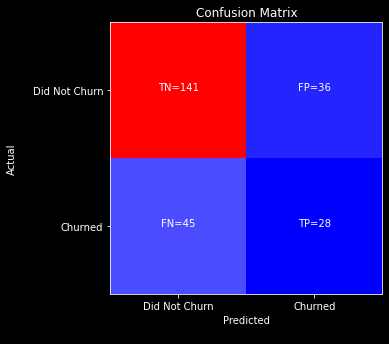





AdaBoostClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 56.0000%
Cross validation scores: 0.6653333333333333
Log Loss: 0.692280163780367


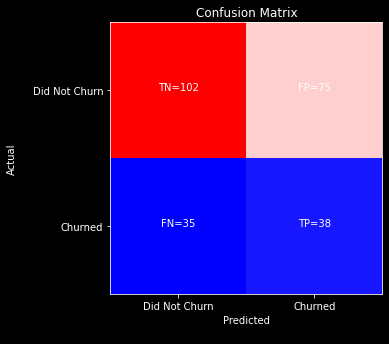





GradientBoostingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 58.8000%
Cross validation scores: 0.7473333333333334
Log Loss: 0.6623810438485103


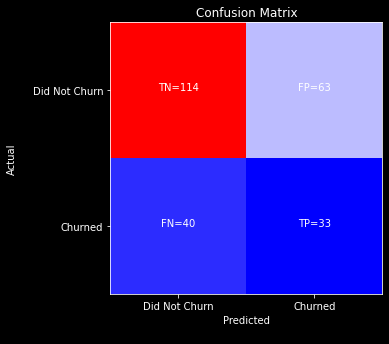

[06:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.




XGBClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 64.8000%
[06:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore t

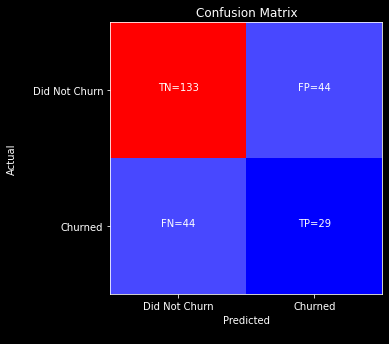





LGBMClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 62.8000%
Cross validation scores: 0.8466666666666667
Log Loss: 0.761778755087606


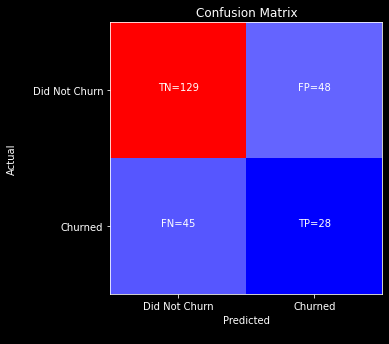

****************************************


In [137]:
#confusion matrix plot function
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='bwr')
    classNames = ['Did Not Churn','Churned']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center')
    plt.show()

#Try modeling using  different classification models
classifiers = [
    #SVC(probability=True, random_state=42), #worst performer so I commented out for plotting
    #DecisionTreeClassifier(), #worst performer so I commented out for plotting
    RandomForestClassifier(random_state=42, n_estimators=100),
    AdaBoostClassifier(random_state=42, n_estimators=100),
    GradientBoostingClassifier(random_state=42, n_estimators=100),
    XGBClassifier(random_state=42, n_estimators=100),
    #ExtraTreesClassifier(random_state=42, n_estimators=100),
    #worst performer so I commented out for plotting
    LGBMClassifier(random_state=42, n_estimators=100)]

#putting results in df
res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results = pd.DataFrame(columns=res_cols)

for clf in classifiers:
    clf.fit(res_X_train, res_y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"Results:")
       
    print('~'*40)
    res_y_pred = clf.predict(res_X_test)
    acc = accuracy_score(res_y_test, res_y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    cv= np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=10))
    print("Cross validation scores:",cv)
    
    
    train_predictions = clf.predict_proba(res_X_test)
    logloss = log_loss(res_y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(res_y_test, res_y_pred)
    
    cm_plot(cm)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(res_y_test,res_y_pred).ravel()
    
    fpr = fp/(tn+fp)
    ers = 1-acc
    rec= recall_score(res_y_test, res_y_pred)
    roc=roc_auc_score(res_y_test, res_y_pred, average='weighted')
    f1s=f1_score(res_y_test, res_y_pred, average='weighted')
    results_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3), 
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),
                                   round(f1s*100,3),round(fpr*100,3),round(ers*100,3)]],
                                 columns=res_cols)
    results = results.append(results_final)
    
print("*"*40)

In [138]:
print("Shape",results.shape)
results.head(10)

Shape (5, 9)


,Classifier,Accuracy,Log Loss,Cross Val,Recall,Roc Auc,F1,False Positive Rate,Error Rate
0,RandomForestClassifier,67.6,0.847,90.200,38.356,59.009,66.937,20.339,32.4
0,AdaBoostClassifier,56.0,0.692,66.533,52.055,54.841,57.929,42.373,44.0
0,GradientBoostingClassifier,58.8,0.662,74.733,45.205,54.806,60.172,35.593,41.2
0,XGBClassifier,64.8,0.890,87.267,39.726,57.434,64.800,24.859,35.2
0,LGBMClassifier,62.8,0.762,84.667,38.356,55.619,63.016,27.119,37.2


In [139]:
#train_tes_split without resampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)





BalancedBaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 62.4000%
Cross validation scores: 0.5933333333333335
Log Loss: 0.6514782134061272


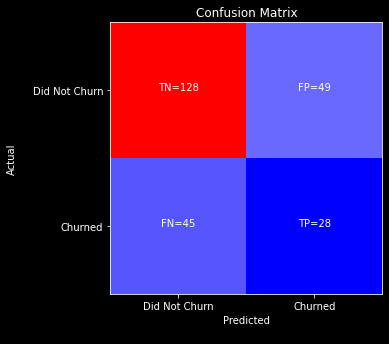





EasyEnsembleClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 58.8000%
Cross validation scores: 0.5786666666666667
Log Loss: 0.6872696136172386


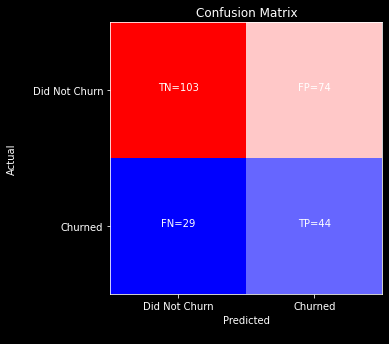





BalancedRandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 57.2000%
Cross validation scores: 0.5866666666666667
Log Loss: 0.6733885706403102


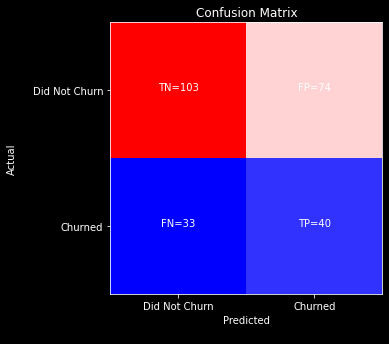

****************************************


In [140]:
#Try modeling using  different classification models
classifiers2 = [
    BalancedBaggingClassifier(max_features=X.shape[1], n_estimators=100, replacement=True,
                              sampling_strategy='all', random_state=42),
    EasyEnsembleClassifier(n_estimators=100, random_state=42, replacement=True,
                           sampling_strategy='all'),
    BalancedRandomForestClassifier(criterion='entropy', max_depth=40,min_samples_leaf = 1, 
                                   max_features=X.shape[1], sampling_strategy='all', 
                                   replacement=True, min_samples_split=8, n_estimators=100,
                                   random_state=42)]

#putting results in df
res_cols2=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results2 = pd.DataFrame(columns=res_cols2)

for clf2 in classifiers2:
    clf2.fit(X_train, y_train)
    name2 = clf2.__class__.__name__
    
    print("\n"*3)
    print(name2,"Results:")
       
    print('~'*40)
    y_pred2 = clf2.predict(X_test)
    acc2 = accuracy_score(y_test, y_pred2)
    print("Accuracy: {:.4%}".format(acc2))
    
    cv2= np.mean(cross_val_score(clf2, X_train, y_train, cv=10))
    print("Cross validation scores:",cv2)
    
    
    train_predictions2 = clf2.predict_proba(X_test)
    logloss2 = log_loss(y_test, train_predictions2)
    print("Log Loss: {}".format(logloss2))
    
    cm2 = confusion_matrix(y_test, y_pred2)
    
    cm_plot(cm2)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred2).ravel()
    
    fpr2 = fp/(tn+fp)
    ers2 = 1-acc2
    rec2= recall_score(y_test, y_pred2)
    roc2=roc_auc_score(y_test, y_pred2, average='weighted')
    f1s2=f1_score(y_test, y_pred2, average='weighted')
    results_final2 = pd.DataFrame([[name2, round(acc2*100,3), round(logloss2,3), 
                                   round(cv2*100,3), round(rec2*100,3), round(roc2*100,3),
                                   round(f1s2*100,3),round(fpr2*100,3),round(ers2*100,3)]],
                                 columns=res_cols2)
    results2 = results2.append(results_final2)
    
print("*"*40)

In [141]:
print("Shape",results2.shape)
results2.head(10)

Shape (3, 9)


,Classifier,Accuracy,Log Loss,Cross Val,Recall,Roc Auc,F1,False Positive Rate,Error Rate
0,BalancedBaggingClassifier,62.4,0.651,59.333,38.356,55.336,62.686,27.684,37.6
0,EasyEnsembleClassifier,58.8,0.687,57.867,60.274,59.233,60.653,41.808,41.2
0,BalancedRandomForestClassifier,57.2,0.673,58.667,54.795,56.493,59.089,41.808,42.8


In [142]:
ml_results = pd.concat([results,results2])
print("Shape",ml_results.shape)
ml_results.head(10)

Shape (8, 9)


,Classifier,Accuracy,Log Loss,Cross Val,Recall,Roc Auc,F1,False Positive Rate,Error Rate
0,RandomForestClassifier,67.6,0.847,90.200,38.356,59.009,66.937,20.339,32.4
0,AdaBoostClassifier,56.0,0.692,66.533,52.055,54.841,57.929,42.373,44.0
0,GradientBoostingClassifier,58.8,0.662,74.733,45.205,54.806,60.172,35.593,41.2
0,XGBClassifier,64.8,0.890,87.267,39.726,57.434,64.800,24.859,35.2
0,LGBMClassifier,62.8,0.762,84.667,38.356,55.619,63.016,27.119,37.2
0,BalancedBaggingClassifier,62.4,0.651,59.333,38.356,55.336,62.686,27.684,37.6
0,EasyEnsembleClassifier,58.8,0.687,57.867,60.274,59.233,60.653,41.808,41.2
0,BalancedRandomForestClassifier,57.2,0.673,58.667,54.795,56.493,59.089,41.808,42.8


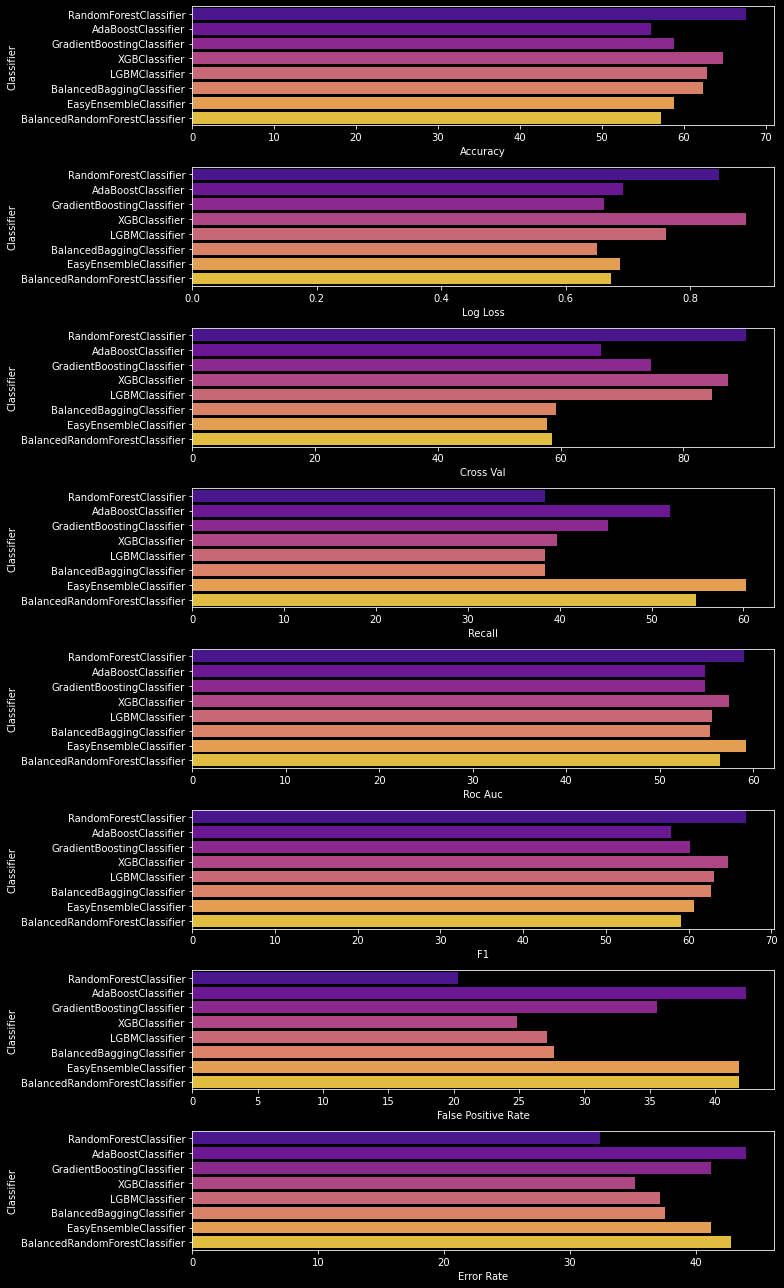

In [143]:
#Visualize scores for all model

fig, ax =plt.subplots(nrows=8, ncols=1, figsize = (11,18))
sns.barplot(x='Accuracy', y='Classifier', data=ml_results, palette='plasma', ax=ax[0])
sns.barplot(x='Log Loss', y='Classifier', data=ml_results, palette='plasma', ax=ax[1])
sns.barplot(x='Cross Val', y='Classifier', data=ml_results, palette='plasma', ax=ax[2])
sns.barplot(x='Recall', y='Classifier', data=ml_results, palette='plasma', ax=ax[3])
sns.barplot(x='Roc Auc', y='Classifier', data=ml_results, palette='plasma', ax=ax[4])
sns.barplot(x='F1', y='Classifier', data=ml_results, palette='plasma', ax=ax[5])
sns.barplot(x='False Positive Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[6])
sns.barplot(x='Error Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[7])

plt.tight_layout()
plt.show()

In [161]:
'''AFTER EVALUATING THE ALGORITHMS AND THEIR PERFORMANCE 
RANDOM FOREST PERFORMED THE BEST OF EACH SO PARAMETER TUNING WILL BE DONE TO IT
FOR THE BEST SET OF PARAMETERS'''

#Get tuning parameter of  random forest
#random forest

#start
tune_start_rfc = time.time()
rfc = RandomForestClassifier()
print('\n')
param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [100, 300],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 50],
    'min_samples_split': [2,4],
    'max_features': ['auto','log2'],
    'n_jobs':[None,2],
    'warm_start': [True,False],
    'random_state':[42]}
grid_rfc = GridSearchCV(rfc, param_grid = param_grid, scoring='accuracy', cv = 10)
grid_rfc.fit(res_X_train,res_y_train)
rfcbest_estimator = grid_rfc.best_estimator_
print("Random Forest:\n",grid_rfc.best_params_)
print('\n')
tune_end_rfc = time.time()
print("\nTuning Random Forest Time: ", tune_end_rfc - tune_start_rfc)




Random Forest:
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': None, 'random_state': 42, 'warm_start': True}



Tuning Random Forest Time:  736.5298027992249






RandomForestClassifier results3:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 66.8000%
Cross validation scores: 0.9060000000000002
Log Loss: 1.7949740408913808


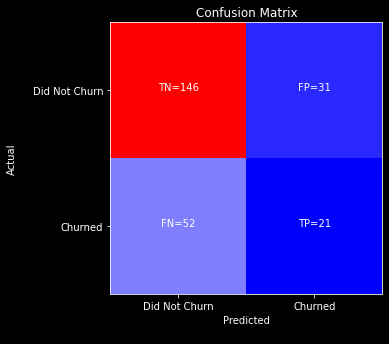

****************************************


In [162]:
#Final Random Forest Modelling
classifiers = [
    RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=None, 
                           min_samples_split=2, n_estimators=300, max_features='auto', 
                           warm_start=True, n_jobs=None, random_state=42)]

#putting results3 in df
res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results3 = pd.DataFrame(columns=res_cols)

for clf in classifiers:
    clf.fit(res_X_train, res_y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"results3:")
       
    print('~'*40)
    res_y_pred = clf.predict(res_X_test)
    acc = accuracy_score(res_y_test, res_y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    cv= np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=10))
    print("Cross validation scores:",cv)
    
    
    train_predictions = clf.predict_proba(res_X_test)
    logloss = log_loss(res_y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(res_y_test, res_y_pred)
    
    cm_plot(cm)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(res_y_test,res_y_pred).ravel()
    
    fpr = fp/(tn+fp)
    ers = 1-acc
    rec= recall_score(res_y_test, res_y_pred)
    roc=roc_auc_score(res_y_test, res_y_pred, average='weighted')
    f1s=f1_score(res_y_test, res_y_pred, average='weighted')
    results3_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3), 
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),
                                   round(f1s*100,3),round(fpr*100,3),round(ers*100,3)]],
                                 columns=res_cols)
    results3 = results3.append(results3_final)
    
print("*"*40)

In [163]:
results3['Classifier'] = results3['Classifier'].replace(['RandomForestClassifier'],
                                                        'RetunedRandomForestClassifier')
results3.head()

,Classifier,Accuracy,Log Loss,Cross Val,Recall,Roc Auc,F1,False Positive Rate,Error Rate
0,RetunedRandomForestClassifier,66.8,1.795,90.6,28.767,55.626,64.941,17.514,33.2


In [164]:
ml_results = pd.concat([results,results2,results3])
ml_results.reset_index(drop=True, inplace=True)
print("Shape",ml_results.shape)
ml_results.head(10)

Shape (9, 9)


,Classifier,Accuracy,Log Loss,Cross Val,Recall,Roc Auc,F1,False Positive Rate,Error Rate
0,RandomForestClassifier,67.6,0.847,90.200,38.356,59.009,66.937,20.339,32.4
1,AdaBoostClassifier,56.0,0.692,66.533,52.055,54.841,57.929,42.373,44.0
2,GradientBoostingClassifier,58.8,0.662,74.733,45.205,54.806,60.172,35.593,41.2
3,XGBClassifier,64.8,0.890,87.267,39.726,57.434,64.800,24.859,35.2
4,LGBMClassifier,62.8,0.762,84.667,38.356,55.619,63.016,27.119,37.2
5,BalancedBaggingClassifier,62.4,0.651,59.333,38.356,55.336,62.686,27.684,37.6
6,EasyEnsembleClassifier,58.8,0.687,57.867,60.274,59.233,60.653,41.808,41.2
7,BalancedRandomForestClassifier,57.2,0.673,58.667,54.795,56.493,59.089,41.808,42.8
8,RetunedRandomForestClassifier,66.8,1.795,90.600,28.767,55.626,64.941,17.514,33.2


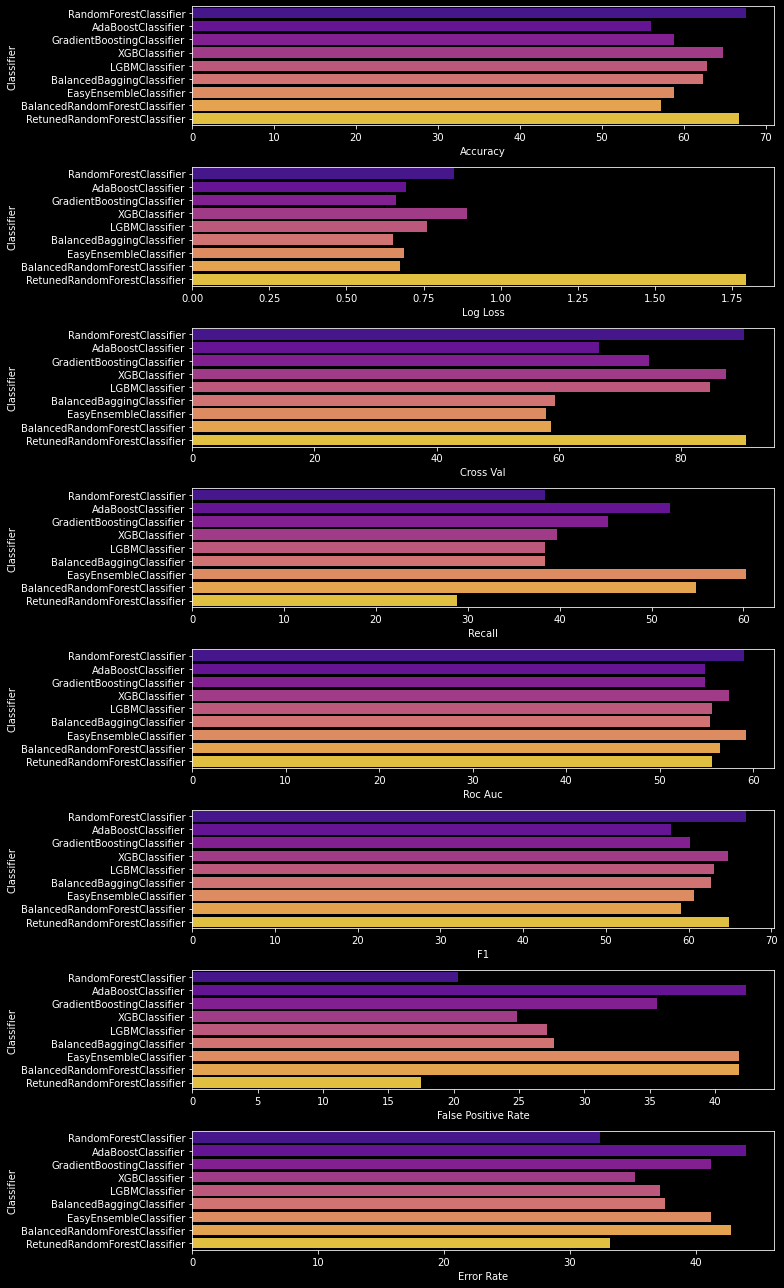

In [165]:
#Visualize scores for all model

fig, ax =plt.subplots(nrows=8, ncols=1, figsize = (11,18))
sns.barplot(x='Accuracy', y='Classifier', data=ml_results, palette='plasma', ax=ax[0])
sns.barplot(x='Log Loss', y='Classifier', data=ml_results, palette='plasma', ax=ax[1])
sns.barplot(x='Cross Val', y='Classifier', data=ml_results, palette='plasma', ax=ax[2])
sns.barplot(x='Recall', y='Classifier', data=ml_results, palette='plasma', ax=ax[3])
sns.barplot(x='Roc Auc', y='Classifier', data=ml_results, palette='plasma', ax=ax[4])
sns.barplot(x='F1', y='Classifier', data=ml_results, palette='plasma', ax=ax[5])
sns.barplot(x='False Positive Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[6])
sns.barplot(x='Error Rate', y='Classifier', data=ml_results, palette='plasma', ax=ax[7])

plt.tight_layout()
plt.show()

In [ ]:
ml_results.to_csv(r'ml_results.csv', index=False)

In [ ]:
''' re-importing cleaned dataframe r'celldata1_to_visualize.csv' to 
                1) ad significant features in their raw state. 
                2) create visualizations to see correlations. '''

#import dataframe
df = pd.read_csv(r'celldata1_to_visualize.csv')

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(df.columns.tolist())

In [ ]:
#new columns

#months
df['months_refurb'] = df['refurb'].astype(str) + '_' + df['refurb'].astype(str)
df['months_models'] = df['months'].astype(str) + '_' + df['models'].astype(str)

#refurb
df['refurb_models'] = df['refurb'].astype(str) + '_' + df['models'].astype(str)
df['refurb_retcalls'] = df['refurb'].astype(str) + '_' + df['retcalls'].astype(str)
df['refurb_retcall'] = df['refurb'].astype(str) + '_' + df['retcall'].astype(str)


#retcall and retcalls
df['retcall_retcalls'] = df['retcall'].astype(str) + '_' + df['retcalls'].astype(str)
df['retcall_retaccpt'] = df['retcall'].astype(str) + '_' + df['retaccpt'].astype(str)
df['retcalls_retaccpt'] = df['retcalls'].astype(str) + '_' + df['retaccpt'].astype(str)

#webcap
df['webcap_refurb'] = df['webcap'].astype(str) + '_' + df['refurb'].astype(str)
df['webcap_przmnum'] = df['webcap'].astype(str) + '_' + df['przm_num'].astype(str)
df['webcap_agegroup'] = df['webcap'].astype(str) + '_' + df['age_group'].astype(str)
df['webcap_income'] = df['webcap'].astype(str) + '_' + df['income'].astype(str)
df['webcap_setprc'] = df['webcap'].astype(str) + '_' + df['setprc'].astype(str)
df['webcap_retcall'] = df['webcap'].astype(str) + '_' + df['retcall'].astype(str)
#did they churn
df['churn_status'] = df.churn.replace(to_replace=[0,1], value=['no','yes'])


In [ ]:
''' 
    ***creating newest df for visualizations***
    setprc(handset price )  wasn't deemed relevent by the chi-squared test,
    however, I would like to see how it visualizes with webcap(Hanset is web capable)
'''

df = df[['age_group', 'months', 'months_models', 'months_refurb', 'refurb', 
              'refurb_models', 'refurb_retcall', 'refurb_retcalls', 'retaccpt', 
              'retcall', 'retcall_retaccpt', 'retcall_retcalls', 'retcalls', 
              'retcalls_retaccpt', 'webcap', 'webcap_agegroup', 'webcap_income', 
              'webcap_przmnum', 'webcap_refurb', 'webcap_retcall', 'setprc','churn','churn_status']]

In [ ]:
df.to_csv(r'churn_to_visualize.csv', index=False)

In [ ]:
print(df.columns.tolist())

In [ ]:
'''
f, axs = plt.subplots(nrows=11, ncols=2,figsize = (10,24))
plt.style.use('dark_background')
sns.countplot(x="age_group", hue="churn", palette="PuBu",data=df, ax=axs[0,0])
sns.countplot(x="months", hue="churn", palette="PuBu",data=df, ax=axs[0,1])
sns.countplot(x="months_models", hue="churn", palette="PuBu",data=df, ax=axs[1,0])
sns.countplot(x="months_refurb", hue="churn", palette="PuBu",data=df, ax=axs[1,1])
sns.countplot(x="refurb", hue="churn", palette="PuBu",data=df, ax=axs[2,0])
sns.countplot(x="refurb_models", hue="churn", palette="PuBu",data=df, ax=axs[2,1])
sns.countplot(x="refurb_retcall", hue="churn", palette="PuBu",data=df, ax=axs[3,0])
sns.countplot(x="refurb_retcalls", hue="churn", palette="PuBu",data=df, ax=axs[3,1])
sns.countplot(x="retaccpt", hue="churn", palette="PuBu",data=df, ax=axs[4,0])
sns.countplot(x="retcall", hue="churn", palette="PuBu",data=df, ax=axs[4,1])
sns.countplot(x="retcall_retaccpt", hue="churn", palette="PuBu",data=df, ax=axs[5,0])
sns.countplot(x="retcall_retcalls", hue="churn", palette="PuBu",data=df, ax=axs[5,1])
sns.countplot(x="retcalls", hue="churn", palette="PuBu",data=df, ax=axs[6,0])
sns.countplot(x="retcalls_retaccpt", hue="churn", palette="PuBu",data=df, ax=axs[6,1])
sns.countplot(x="webcap", hue="churn", palette="PuBu",data=df, ax=axs[7,0])
sns.countplot(x="webcap_agegroup", hue="churn", palette="PuBu",data=df, ax=axs[7,1])
sns.countplot(x="webcap_income", hue="churn", palette="PuBu",data=df, ax=axs[8,0])
sns.countplot(x="webcap_przmnum", hue="churn", palette="PuBu",data=df, ax=axs[8,1])
sns.countplot(x="webcap_refurb", hue="churn", palette="PuBu",data=df, ax=axs[9,0])
sns.countplot(x="webcap_retcall", hue="churn", palette="PuBu",data=df, ax=axs[9,1])
plt.tight_layout()
plt.savefig('treatment.png')
plt.show()
'''